In [132]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [2]:
data = pd.read_csv('heart-data.csv')

In [3]:
df = pd.DataFrame(data)
pd.set_option('display.max_columns',25)

In [4]:
#sex : 0 is female and 1 is male
#cp : assume that higher the number, more intense the chest pain is
#trestbps : Resting Blood Pressure
#chol : Serum cholestrol
#fbs : Fasting Blood pressure, over 120 means 1 that is unhealthy level
#restecg : not sure about the ordinality of the number
#thalach : max heart rate
#exang : pain in chest after exercise, presumably 1 indicates yes
#oldpeak : measure of abnormality in beating of heart recorded by an electrocardiogram
#slope : quality of blood flow to the heart
#ca : unsure, may refer calcilum build up in coronary
#thal : thaliumm stress test

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

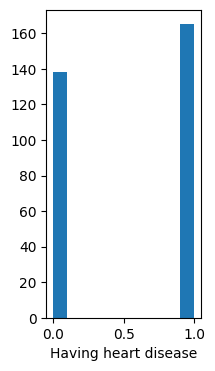

In [8]:
plt.figure(figsize=(2,4))
plt.hist(df['target'],color='#1f77b4')
plt.xlabel('Having heart disease')
plt.show()

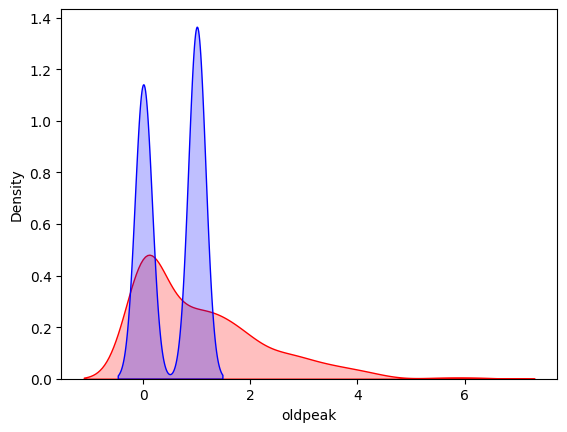

In [9]:
sns.kdeplot(df['oldpeak'],color='red',fill=True)
sns.kdeplot(df['target']==1,color='blue',fill=True)
plt.show()

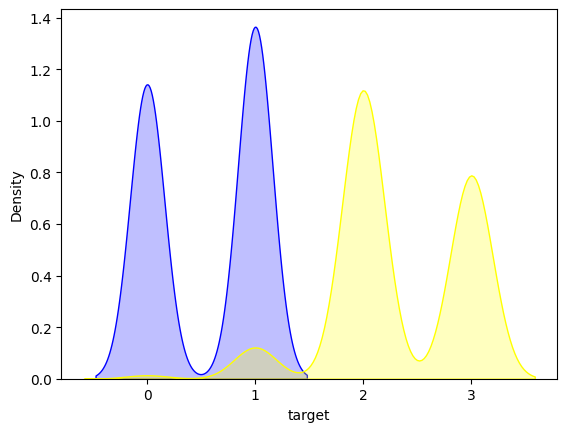

In [10]:
sns.kdeplot(df['target']==1,color='blue',fill=True)
sns.kdeplot(df['thal'],color='yellow',fill=True)
plt.show()

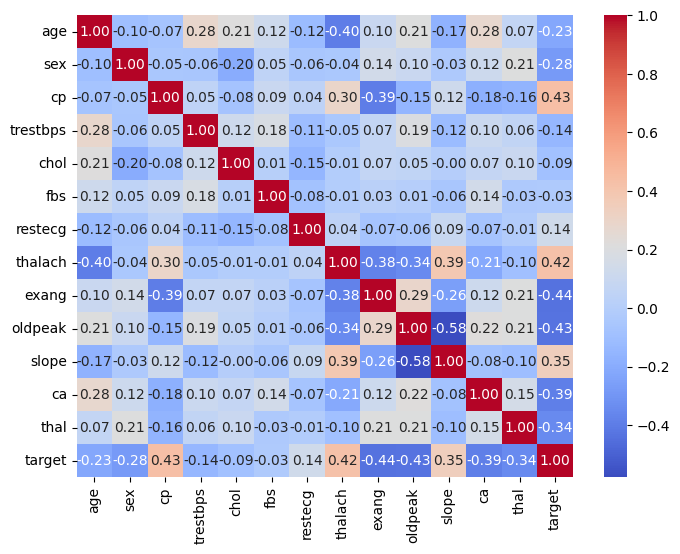

In [87]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [11]:
df['slope'].value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

In [12]:
ode_columns = ['cp','fbs','restecg','ca','thal','slope']
ohe_columns = ['sex']

In [13]:
X = df.drop(columns=['target'])
y = df.iloc[:,13]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.25)

In [15]:
ode = OrdinalEncoder()

In [16]:
ohe = OneHotEncoder()

In [17]:
col_trans = ColumnTransformer(
    transformers=[('OrdinalEncoding',ode,ode_columns),
                 ('OneHotEncoding',ohe,ohe_columns)],
    remainder = 'passthrough',
    n_jobs=-1
)

In [18]:
col_trans

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('OrdinalEncoding', OrdinalEncoder(),
                                 ['cp', 'fbs', 'restecg', 'ca', 'thal',
                                  'slope']),
                                ('OneHotEncoding', OneHotEncoder(), ['sex'])])

In [19]:
rfc = RandomForestClassifier()

In [20]:
param_grid = {
    'n_estimators' : [100,200,300],
    'min_samples_split' : [5,10,15],
    'max_depth' : [8,9,10,15,20],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini','entropy'],
}

In [21]:
cv = GridSearchCV(rfc,param_grid = param_grid, cv = StratifiedKFold(n_splits=2))

In [22]:
pipe = make_pipeline(col_trans,cv)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2


In [24]:
y_train

24     1
246    0
62     1
235    0
78     1
      ..
211    0
67     1
25     1
196    0
175    0
Name: target, Length: 227, dtype: int64

In [25]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['cp', 'fbs', 'restecg', 'ca',
                                                   'thal', 'slope']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(), ['sex'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 200, 300]}))])

In [26]:
print(cv.best_params_)


{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [27]:
print(cv.best_score_)

0.8856544014904517


In [28]:
dtc = DecisionTreeClassifier()

In [29]:
param_grid = {
    'min_samples_split' : [5,10,15],
    'max_depth' : [10,20,30],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini','entropy'],
}

In [30]:
dtc_cv = GridSearchCV(dtc,param_grid = param_grid, cv = StratifiedKFold(n_splits=2))

In [31]:
pipedtc = make_pipeline(col_trans,dtc_cv)

In [32]:
pipedtc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['cp', 'fbs', 'restecg', 'ca',
                                                   'thal', 'slope']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(), ['sex'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [33]:
print(dtc_cv.best_params_)


{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [34]:
print(dtc_cv.best_score_)

0.8063577084303679


In [35]:
lr = LogisticRegression()

In [36]:
param_grid = {
    'max_iter' : [1000,2000,4000,8000],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [37]:
dtc_lr = GridSearchCV(lr,param_grid,cv = StratifiedKFold(n_splits=2))

In [38]:
pipelr = make_pipeline(col_trans,dtc_lr)

In [39]:
pipelr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['cp', 'fbs', 'restecg', 'ca',
                                                   'thal', 'slope']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(), ['sex'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'max_iter': [1000, 2000, 4000, 8000],
                                          'solver': ['lbfgs', 'liblinear',
                                                     'newton-cg',
                                                     'newton-cholesky', 'sag',
                                                     'saga']}))])

In [40]:
print(dtc_lr.best_params_)

{'max_iter': 8000, 'solver': 'sag'}


In [41]:
print(dtc_lr.best_score_)

0.8811908088806086


In [106]:
lr2 = LogisticRegression(max_iter= 8000, solver= 'sag',random_state=11)

In [107]:
pipelr2 = make_pipeline(col_trans,lr2)

In [108]:
pipelr2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['cp', 'fbs', 'restecg', 'ca',
                                                   'thal', 'slope']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(), ['sex'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=8000, random_state=11,
                                    solver='sag'))])

In [109]:
pipelr2.score(X_test,y_test)

0.7368421052631579

In [102]:
dtc2 = DecisionTreeClassifier(criterion='log_loss',max_depth = 20,min_samples_leaf=8,min_samples_split=4,random_state=11)

In [103]:
pipedtc2 = make_pipeline(col_trans,dtc2)

In [104]:
pipedtc2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['cp', 'fbs', 'restecg', 'ca',
                                                   'thal', 'slope']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(), ['sex'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=20,
                                        min_samples_leaf=8, min_samples_split=4,
                                        random_state=11))])

In [105]:
pipedtc2.score(X_test,y_test)

0.7368421052631579

In [110]:
rfc2 = RandomForestClassifier(criterion='log_loss',max_depth=20,min_samples_leaf=5,min_samples_split=5,n_estimators=200,random_state=11)

In [111]:
piperfc2 = make_pipeline(col_trans,rfc2)

In [112]:
piperfc2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['cp', 'fbs', 'restecg', 'ca',
                                                   'thal', 'slope']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(), ['sex'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=20,
                                        min_samples_leaf=5, min_samples_split=5,
                                        n_estimators=200, random_state=11))])

In [113]:
piperfc2.score(X_test,y_test)

0.7236842105263158

In [54]:
rfc3 = RandomForestClassifier()

In [55]:
rfc3.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
rfc3.score(X_test,y_test)

0.7105263157894737

In [57]:
#there is a .05 gap between default and our best score for RandomForestClassifier

In [89]:
abc = AdaBoostClassifier(algorithm='SAMME',estimator=rfc2,random_state=11)

In [90]:
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(criterion='log_loss',
                                                    max_depth=20,
                                                    min_samples_leaf=5,
                                                    min_samples_split=5,
                                                    n_estimators=200),
                   random_state=11)

In [91]:
abc.score(X_test,y_test)

0.7236842105263158

In [115]:
pipeabc = make_pipeline(col_trans,abc)

In [116]:
pipeabc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['cp', 'fbs', 'restecg', 'ca',
                                                   'thal', 'slope']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(), ['sex'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=RandomForestClassifier(criterion='log_loss',
                                                                     max_depth=20,
                                                                     min_samples_leaf=5,
                                                                     min_samples_split=5,
                                                                     n_estimators=200),
                                    random_state=11))])

In [117]:
pipeabc.score(X_test,y_test)

0.75

In [98]:
gbc = GradientBoostingClassifier(loss='log_loss',random_state=11)

In [99]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [100]:
gbc.score(X_test,y_test)

0.6973684210526315

In [118]:
pipegbc = make_pipeline(col_trans,gbc)

In [119]:
pipegbc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['cp', 'fbs', 'restecg', 'ca',
                                                   'thal', 'slope']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(), ['sex'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [120]:
pipegbc.score(X_test,y_test)

0.6973684210526315

In [101]:
from tabulate import tabulate

In [122]:
my_data = [
    [1,'Random Forest', piperfc2.score(X_test,y_test)],
    [2,'Decision Tree', pipedtc2.score(X_test,y_test)],
    [3,'Ada Boost', pipeabc.score(X_test,y_test)],
    [4,'Gradient Boosting', pipegbc.score(X_test,y_test)],
    [5,'Logistic Regression', pipelr2.score(X_test,y_test)],
]

columns = ['Algorithm' , 'Accuracy']

print(tabulate(my_data,headers=columns,tablefmt = 'grid'))

+----+---------------------+------------+
|    | Algorithm           |   Accuracy |
+====+=====================+============+
|  1 | Random Forest       |   0.723684 |
+----+---------------------+------------+
|  2 | Decision Tree       |   0.736842 |
+----+---------------------+------------+
|  3 | Ada Boost           |   0.75     |
+----+---------------------+------------+
|  4 | Gradient Boosting   |   0.697368 |
+----+---------------------+------------+
|  5 | Logistic Regression |   0.736842 |
+----+---------------------+------------+


In [150]:
#best model overall we got is Adaboost(Adaptive Boosting) to find the people who dont suffering from any heart related ailments
#high recall means that how many instances were correctly predicted
#as we want to find all the instances when a person has some heart ailment, we are going to choose Decision Tree Classifier as it has the higest ratio of predicted positives to total positives

In [143]:
y_pred_rfc = piperfc2.predict(X_test)
print(f'Accuracy Score of Random Forest Classifier : {accuracy_score(y_test,y_pred_rfc)}')
print()
print(classification_report(y_test,y_pred_rfc))

Accuracy Score of Random Forest Classifier : 0.7236842105263158

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        39
           1       0.67      0.84      0.75        37

    accuracy                           0.72        76
   macro avg       0.74      0.73      0.72        76
weighted avg       0.74      0.72      0.72        76



In [146]:
y_pred_dtc = pipedtc2.predict(X_test)
print(f'Accuracy Score of Decison Tree Classifier : {accuracy_score(y_test,y_pred_dtc)}')
print()
print(classification_report(y_test,y_pred_dtc))

Accuracy Score of Decison Tree Classifier : 0.7368421052631579

              precision    recall  f1-score   support

           0       0.95      0.51      0.67        39
           1       0.65      0.97      0.78        37

    accuracy                           0.74        76
   macro avg       0.80      0.74      0.72        76
weighted avg       0.81      0.74      0.72        76



In [147]:
y_pred_abc = pipeabc.predict(X_test)
print(f'Accuracy Score of Adaptive Boosting Classifier : {accuracy_score(y_test,y_pred_abc)}')
print()
print(classification_report(y_test,y_pred_abc))

Accuracy Score of Adaptive Boosting Classifier : 0.75

              precision    recall  f1-score   support

           0       0.86      0.62      0.72        39
           1       0.69      0.89      0.78        37

    accuracy                           0.75        76
   macro avg       0.77      0.75      0.75        76
weighted avg       0.77      0.75      0.75        76



In [148]:
y_pred_gbc = pipegbc.predict(X_test)
print(f'Accuracy Score of Gradient Boosting Classifier : {accuracy_score(y_test,y_pred_gbc)}')
print()
print(classification_report(y_test,y_pred_gbc))

Accuracy Score of Gradient Boosting Classifier : 0.6973684210526315

              precision    recall  f1-score   support

           0       0.79      0.56      0.66        39
           1       0.65      0.84      0.73        37

    accuracy                           0.70        76
   macro avg       0.72      0.70      0.69        76
weighted avg       0.72      0.70      0.69        76



In [149]:
y_pred_lr = pipelr2.predict(X_test)
print(f'Accuracy Score of Logistic Regression : {accuracy_score(y_test,y_pred_rfc)}')
print()
print(classification_report(y_test,y_pred_lr))

Accuracy Score of Logistic Regression : 0.7236842105263158

              precision    recall  f1-score   support

           0       0.85      0.59      0.70        39
           1       0.67      0.89      0.77        37

    accuracy                           0.74        76
   macro avg       0.76      0.74      0.73        76
weighted avg       0.77      0.74      0.73        76



In [151]:
#we will choose Decision Tree Classifier model due to its high TPR